# Paso 4. Análisis exploratorio de datos (Python)


## Importar las librerias

In [1]:
#Inicialización
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns
import math 
from scipy.stats import ttest_ind

In [2]:
# Importar los archivos

cabs = pd.read_csv('/datasets/project_sql_result_01.csv')
trips = pd.read_csv('/datasets/project_sql_result_04.csv')
neighborhoods = pd.read_csv('/datasets/project_sql_result_07.csv')

## Evaluar los datos

### Cabs

In [3]:
print('Cabs: ')
print()
# obtener iformación del DF
print(cabs.info())
print()
display(cabs.head(10))
print()
# Evaluar valores ausentes
print('Valores ausentes: \n', cabs.isnull().sum())
print()
# Evaluar valores duplicados
print( 'Valores duplicados: \n',cabs.value_counts())

Cabs: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953



Valores ausentes: 
 company_name    0
trips_amount    0
dtype: int64

Valores duplicados: 
 company_name                  trips_amount
0118 - 42111 Godfrey S. Awir  33              1
1085 - 72312 N and W Cab Co   29              1
Checker Taxi                  1486            1
Checker Taxi Affiliation      2216            1
Chicago Carriage Cab Corp     9181            1
                                             ..
6057 - 24657 Richard Addo     13              1
6574 - Babylon Express Inc.   31              1
6742 - 83735 Tasha Ride Inc   39              1
6743 - 78771 Luhak Corp       33              1
Yellow Cab                    9888            1
Length: 64, dtype: int64


El tipo de datos para el Data Frame cabs es:

company_name: Tipo de dato object, su tipo de dato es correcto, puesto que el nombre de la compañía corresponde a una cadena de caracteres

trips_amount: Tipo de dato int64, su tipo de dato es correcto, puesto que el número de viajes de cada compañía de taxis corresponde a un número entero.

No hay vlaores ausentes ni valores duplicados.

### Trips

In [4]:
print('Trips: ')
print()
# obtener iformación del DF
print(trips.info())
print()
display(trips.head(10))
# Evaluar valores ausentes
print('Valores ausentes: \n', trips.isnull().sum())
print()
# Evaluar valores duplicados
print( 'Valores duplicados: \n',trips.value_counts())

Trips: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Valores ausentes: 
 dropoff_location_name    0
average_trips            0
dtype: int64

Valores duplicados: 
 dropoff_location_name  average_trips
Albany Park            180.900000       1
North Center           393.266667       1
River North            9523.666667      1
Pullman                3.896552         1
Portage Park           119.733333       1
                                       ..
Gage Park              8.233333         1
Fuller Park            8.166667         1
Englewood              25.433333        1
Edison Park            14.166667        1
Wrigleyville           14.233333        1
Length: 94, dtype: int64


El tipo de datos para el Data Frame trips es:

dropoff_location_name: Tipo de dato object, su tipo de dato es correcto, puesto que el nombre de los barrios en Chicago corresponde a una cadena de caracteres

average_trips: Tipo de dato int64, su tipo de dato es correcto, puesto que el promedio de viajes  corresponde a un número flotante.

No hay vlaores ausentes ni valores duplicados.

### Neighborhoods

In [5]:
# obtener iformación del DF
print(neighborhoods.info())
print()
display(neighborhoods.head(10))
print()
# Evaluar valores ausentes
print('Valores ausentes: \n', neighborhoods.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0



Valores ausentes: 
 start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [6]:
# cambiar el tipo de datos de la columna start_ts de object a fecha

neighborhoods['start_ts'] = pd.to_datetime(neighborhoods['start_ts'], format = '%Y/%m/%d %H:%M:%S')

In [7]:
print(neighborhoods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


El tipo de datos para el Data Frame neighborhoods es:

start_ts: Tipo de dato object, su tipo de dato era incorrecto, puesto que la fecha y hora de la recogida aparecían como object, sin embargo estos datos deben de tener formato de datetime, por lo que se hizo la corrección cambiando el tipo de dato.

weather_conditions: Tipo de dato object, su tipo de dato es correcto, puesto que las condiciones climáticas corresponde a una cadena de caracteres.

duration_seconds: Tipo de dato float64, su tipo de dato es correcto, puesto que la duración del viaje en segundos corresponde a una número flotante.

No hay vlaores ausentes ni valores duplicados.

## Analisis de los datos

### Principales barrios en términos de finalización del recorrido

In [8]:
# Obtener los 10 principales barrios en términos de finalización del recorrido
top_10_neighborhoods = trips.sort_values(by = 'average_trips', ascending = False).head(10)
display(top_10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### gráficos

#### Empresas de taxis y número de viajes

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<Figure size 1000x600 with 0 Axes>

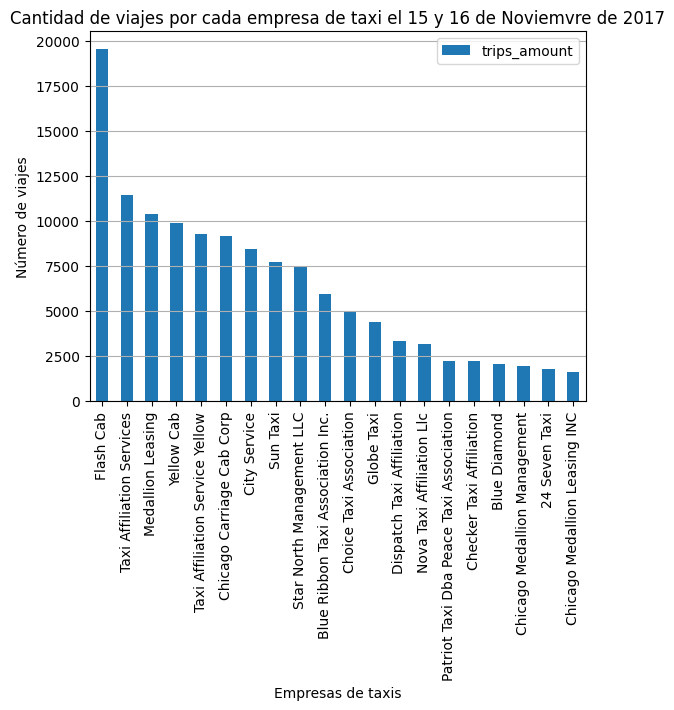

In [9]:
# Obtener las primeras 20 empresas en cuanto a la cantidad de viajes
top_20_cabs = cabs.sort_values(by = 'trips_amount', ascending = False).head(20)
display(top_20_cabs)
plt.figure(figsize=(10, 6))
top_20_cabs.plot(x= 'company_name',
         kind = 'bar',
          title = 'Cantidad de viajes por cada empresa de taxi el 15 y 16 de Noviemvre de 2017',
          xlabel = 'Empresas de taxis',
          ylabel = 'Número de viajes',
         )

plt.grid(axis = 'y')

plt.show()


El gráfico muestra la cantidad de viajes realizados por las principales empresas de taxis durante el 15 y 16 de noviembre de 2017.

Se tomaron las 20 empresas de taxis con mayor cantidad de viajes durante estos días, puesto que las otras empresas no tuvieron una cantidad de viajes significativa.


A partir de la observación del gráfico se puede concluir:


1. Flash Cab es la empresa con mayor cantidad de viajes, con aproximadamente 19558 viajes realizados durante el 15 y 16 de Noviembre del 2017. Esto podría indicar que Flash Cab es una de las opciones de transporte más populares entre los usuarios de taxis en Chicago durante ese período.

2. Las empresas que le siguen en cantidad de viajes son Taxi Affiliation Services (11422 viajes) y Medallion Leasing (10367 viajes), mostrando una diferencia significativa en comparación con la empresa líder, Flash Cab, pero aún así con números considerables.

3. También se observa una variabilidad considerable entre las cantidades de viajes realizados por las diferentes empresas, lo que indica una distribución no uniforme del mercado entre los proveedores de servicios de taxi en Chicago.

#### 10 barrios principales por número de finalizaciones

<Figure size 1000x600 with 0 Axes>

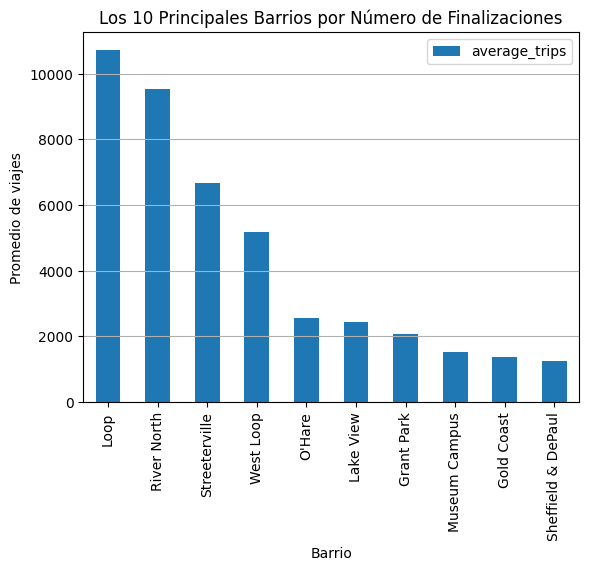

In [10]:
plt.figure(figsize = (10,6))
top_10_neighborhoods.plot(x = 'dropoff_location_name',
                         kind = 'bar',
                          title = 'Los 10 Principales Barrios por Número de Finalizaciones',
                          xlabel = 'Barrio',
                          ylabel= 'Promedio de viajes'
                         )

plt.grid(axis = 'y')

plt.show()

Este gráfico muestra los 10 principales barrios de Chicago en términos del promedio de viajes que finalizan en cada uno de ellos.

A partir de la observación del gráfico se puede concluir:

1. Loop es el barrio con la mayor cantidad promedio de viajes que finalizan en él, con aproximadamente 10727 viajes en promedio durante el mes de noviembre de 2017. Esto podría indicar que el barrio Loop es una de las áreas más transitadas de la ciudad, por lo tanto una de las áreas mayormente frecuentada por los taxis durante el mes de Noviembre en la ciudad de Chicago

2. River North con un promedio de 9524 viajes, seguido por Streeterville con 6664 viajes en promedio. Estos son barrios que también muestran una alta demanda de servicios de taxi.

3. Otros barrios como West Loop, O'Hare, Lake View, y Grant Park también muestran un promedio considerable de viajes de taxi, lo que indica que son áreas importantes de actividad y destino en la ciudad de Chicago.

## Prueba de hipótesis 

Hipótesis nula H0 =  La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipótesis alternativa = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

alpha = 0.05 Voy a usar el nivel estandar

Hipótesis sobre la igualdad de las medias de dos poblaciones

Prueba estadística = Prueba ttest

In [11]:
# Extraer el dia sabado 
saturday = neighborhoods[neighborhoods['start_ts'].dt.day_name() == 'Saturday']

# Filtrar los dias de acuerdo al estado del clima

avg_trips_duration_bad_sat = saturday[saturday['weather_conditions'] == 'Bad']['duration_seconds']
avg_trips_duration_good_sat = saturday[saturday['weather_conditions'] == 'Good']['duration_seconds']

alpha = 0.05

results = st.ttest_ind(avg_trips_duration_bad_sat, avg_trips_duration_good_sat, equal_var = False)

# Realizar la prueba de igualdad de varianzas usando el test de Levene
statistic, p_value = st.levene(avg_trips_duration_bad_sat, avg_trips_duration_good_sat)

print('Estadístico de Levene:', statistic)

print('Valor p: ', results.pvalue)

# compara los valores p obtenidos con el nivel de significación estadística

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Estadístico de Levene: 0.38853489683656073
Valor p:  6.738994326108734e-12
Rechazamos la hipótesis nula


### cómo planteaste las hipótesis nula y alternativa

La H₀ suele expresar la idea de que no hay diferencias entre los grupos. Esta hipótesis nula supone que no hay ningún cambio o efecto, esta hipótesis suele darse por cierta hasta que se presentan pruebas que la desmienten.

utilizamos la hipótesis nula para asegurarnos de que los valores obtenidos en el experimento no son extremos, sino que caen dentro del rango esperado.

La elección de la hipótesis nula se basó en la idea de que no hay diferencias entre los grupos, y se estableció una significancia alfa de 0.05, que es un valor comúnmente utilizado como estándar en la mayoría de las pruebas de hipótesis.

En este caso la hipótesis nula es "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos", se eligío como hipótesis nula porque expresa la idea de que no hay diferencias entre los grupos.

La hipótesis alternativa, H₁, se basa en H₀

Hipótesis nula = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos

Hipótesis alternativa = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

### Qué criterio utilizaste para probar las hipótesis y por qué.

La prueba t de Student (t-test) se utilizó en este análisis para comparar las medias de dos muestras independientes: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados con mal tiempo o lluvioso (weather_conditions = 'Bad') y los sábados con buen tiempo o soleados (weather_conditions = 'Good'). Se optó por esta prueba estadística debido a que se estaban comparando dos grupos diferentes y se quería determinar si las diferencias observadas entre las medias de estos grupos eran estadísticamente significativas.

Para el valor de alpha se eligí 0.05, siendo este un valor a nivel estandar.

Prueba estadística = Prueba ttest

El valor p obtenido (6.738994326108734e-12) fue  menor que el nivel de significancia alpha (0.05), lo que indica que hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, se concluye que posiblemente la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

## Conclusiones Generales

1. Cantidad de viajes de las diferentes empresas de taxis en la ciudad de Chicago


Durante el período de estudio, se identificaron las principales empresas de taxis en Chicago en función del número de viajes realizados. Este estudio nos indica que Flash Cab, Taxi Affiliation Services y Medallion Leasing ocuparon las primeras posiciones en términos de cantidad de viajes realizados, con una cantidad significativa durante los días 15 y 16 de noviembre de 2017. 

2. Principales barrios de Chicago en cuanto al promedio de viajes que finalizaron en estos.


Los resultados mostraron que Loop, River North y Streeterville fueron los barrios más transitados, con una alta demanda de servicios de taxi. Esto pudiendo indicar que estos barrios son los más populares en la ciudad, y las personas prefieren ir a estos con mayor frecuencia a la hora de usar taxi.

3. Impacto del clima en la duración de los viajes

Se realizó una prueba de hipótesis para comparar la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en días lluviosos y soleados. Los resultados indicaron diferencias significativas en la duración de los viajes entre días con mal tiempo y días soleados, lo que sugiere un efecto del clima en la movilidad urbana.